# colab環境における設定

In [1]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import numpy as np
import pandas as pd
import warnings
import json
import glob
from scipy import stats
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'scipy'

In [5]:
try:
   import geemap, ee
   import seaborn as sns
   import matplotlib.pyplot as plt
   import geopandas as gpd
   from matplotlib import cm

except ModuleNotFoundError:
   if 'google.colab' in str(get_ipython()):
       print("package not found, installing w/ pip in Google Colab...")
       !pip install geemap seaborn matplotlib
       !pip install geopandas
   else:
       print("package not found, installing w/ conda...")
       !conda install mamba -c conda-forge -y
       !mamba install geemap -c conda-forge -y
       !conda install seaborn matplotlib -y
   import geemap, ee
   import seaborn as sns
   import matplotlib.pyplot as plt
   import geopandas as gpd
   from matplotlib import cm


package not found, installing w/ conda...
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


ModuleNotFoundError: No module named 'geemap'

In [3]:
try:
        ee.Initialize(project='tenacious-torus-402505')
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

# Local環境における設定

In [1]:
#!pip install geopandas
#!pip install geemap seaborn matplotlib numpy pandas scipy

In [2]:
import numpy as np
import pandas as pd
import warnings
import json
import glob
from scipy import stats
warnings.filterwarnings('ignore')


In [3]:
#!pip install geemap

In [4]:
#!pip install pkg_resources
import geemap, ee
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import cm

In [5]:
try:
        ee.Initialize(project='tenacious-torus-402505')
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

# 都道府県におけるデータ分析

/Users/esakikeiichi/Downloads/行政区域データ 20240101/N03-20240101.shp
['北海道' '青森県' '岩手県' '宮城県' '秋田県' '山形県' '福島県' '茨城県' '栃木県' '群馬県' '埼玉県' '千葉県'
 '東京都' '神奈川県' '新潟県' '富山県' '石川県' '福井県' '山梨県' '長野県' '岐阜県' '静岡県' '愛知県' '三重県'
 '滋賀県' '京都府' '大阪府' '兵庫県' '奈良県' '和歌山県' '鳥取県' '島根県' '岡山県' '広島県' '山口県' '徳島県'
 '香川県' '愛媛県' '高知県' '福岡県' '佐賀県' '長崎県' '熊本県' '大分県' '宮崎県' '鹿児島県' '沖縄県']


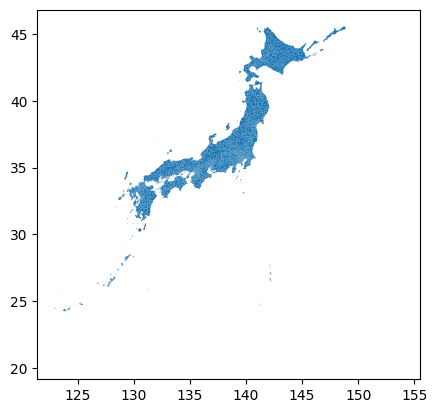

In [9]:
#jpn_shp_path = '/Users/esakikeiichi/date_analysis/github/git_ds/GIS/行政区域データ N03-190101/N03-19_190101.shp'
jpn_shp_path = '/Users/esakikeiichi/Downloads/行政区域データ 20240101/N03-20240101.shp'
print(jpn_shp_path)
jpnShp = gpd.read_file(jpn_shp_path,crs='EPSG:4326')
df = json.loads(jpnShp.to_json())
jpnShp.plot()
pres = jpnShp['N03_001'].unique()
print(pres)

In [15]:
df

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'N03_001': '北海道',
    'N03_002': 'オホーツク総合振興局',
    'N03_003': None,
    'N03_004': '北見市',
    'N03_007': '01208'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[144.0814354729688, 44.12506038682744],
      [144.08142697797268, 44.12505705393994],
      [144.0814077171924, 44.12505835975554],
      [144.08139907920417, 44.12506510826819],
      [144.08139883279, 44.12507186487471],
      [144.0814036450622, 44.12509258615398],
      [144.0814195585658, 44.125165666862074],
      [144.08142379976857, 44.125202054331396],
      [144.08143380022977, 44.125253802221266],
      [144.08145983110637, 44.125327468388036],
      [144.08153007805072, 44.12531380229018],
      [144.08146282674807, 44.12514538714993],
      [144.0814354729688, 44.12506038682744]]]}},
  {'id': '1',
   'type': 'Feature',
   'properties': {'N03_001': '北海道',
    'N03_002': 'オホーツク総合振興局',
    'N03_003': None,
    'N

In [6]:
try:
        ee.Initialize(project='tenacious-torus-402505')
except Exception as e:
        ee.Authenticate()
        ee.Initialize()
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2019-04-01", "2020-03-31").select('avg_rad').median()
print(viirs)

ee.Image({
  "functionInvocationValue": {
    "functionName": "reduce.median",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.map",
          "arguments": {
            "baseAlgorithm": {
              "functionDefinitionValue": {
                "argumentNames": [
                  "_MAPPING_VAR_0_0"
                ],
                "body": {
                  "functionInvocationValue": {
                    "functionName": "Image.select",
                    "arguments": {
                      "bandSelectors": {
                        "constantValue": [
                          "avg_rad"
                        ]
                      },
                      "input": {
                        "argumentReference": "_MAPPING_VAR_0_0"
                      }
                    }
                  }
                }
              }
            },
            "collection": {
              "functionInvocationValue

# 単年の夜間光データ作成

In [6]:
def get_prefectures_geo(prefecture):
 features = [f for f in df['features'] if f['properties']['N03_001']==prefecture]
 return ee.Geometry.MultiPolygon(features[0]['geometry']['coordinates'])

cols_nl = ['pres', '2019-NL']
df_nl = pd.DataFrame(index=[], columns=cols_nl)
print(df_nl)

# あらかじめデータを収集するリストを用意
data = []

for pres_name in pres:
    print(pres_name)
    aoi = get_prefectures_geo(pres_name)
    mean_rad = ee.Number(viirs.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi, scale=25).get('avg_rad')).getInfo()
    print(mean_rad)
    data.append([pres_name, mean_rad])

# リストからデータフレームを作成
new_df = pd.DataFrame(data, columns=cols_nl)
print(new_df)

Empty DataFrame
Columns: [pres, 2019-NL]
Index: []
北海道
1.4300000667572021
青森県
13.719999313354492
岩手県
1.3349096971259133
宮城県
3.7860284054817033
秋田県
4.085000038146973
山形県
2.5419303382848084
福島県
1.412972584592655
茨城県
5.941084284786024
栃木県
5.329556907056614
群馬県
4.283784772052364
埼玉県
3.3068202431751943
千葉県
49.30888246505998
東京都
84.87232971929082
神奈川県
16.16146118721265
新潟県
7.854999542236328
富山県
2.7850000858306885
石川県
1.571745991526021
福井県
0.5600000023841858
山梨県
3.5410296945261654
長野県
1.531663679005565
岐阜県
7.025247619462615
静岡県
0.9519411939698388
愛知県
41.04318916840705
三重県
5.014671473607529
滋賀県
2.718728406171369
京都府
2.8164677990135782
大阪府
55.89206358096737
兵庫県
2.6719151151426987
奈良県
5.431659208040803
和歌山県
7.280652639743506
鳥取県
1.0149999856948853
島根県
0.33000001311302185
岡山県
2.797385656627285
広島県
36.07428504480851
山口県
4.194999694824219
徳島県
1.1799999475479126
香川県
19.880001068115234
愛媛県
3.2605825581596894
高知県
1.375
福岡県
2.125
佐賀県
2.2197684915154205
長崎県
0.25
熊本県
28.165693655977687
大分県
0.389999985694

In [9]:
new_df

pres    2019-NL
0    北海道   1.430000
1    青森県  13.719999
2    岩手県   1.334910
3    宮城県   3.786028
4    秋田県   4.085000
5    山形県   2.541930
6    福島県   1.412973
7    茨城県   5.941084
8    栃木県   5.329557
9    群馬県   4.283785
10   埼玉県   3.306820
11   千葉県  49.308882
12   東京都  84.872330
13  神奈川県  16.161461
14   新潟県   7.855000
15   富山県   2.785000
16   石川県   1.571746
17   福井県   0.560000
18   山梨県   3.541030
19   長野県   1.531664
20   岐阜県   7.025248
21   静岡県   0.951941
22   愛知県  41.043189
23   三重県   5.014671
24   滋賀県   2.718728
25   京都府   2.816468
26   大阪府  55.892064
27   兵庫県   2.671915
28   奈良県   5.431659
29  和歌山県   7.280653
30   鳥取県   1.015000
31   島根県   0.330000
32   岡山県   2.797386
33   広島県  36.074285
34   山口県   4.195000
35   徳島県   1.180000
36   香川県  19.880001
37   愛媛県   3.260583
38   高知県   1.375000
39   福岡県   2.125000
40   佐賀県   2.219768
41   長崎県   0.250000
42   熊本県  28.165694
43   大分県   0.390000
44   宮崎県   0.620000
45  鹿児島県   0.665000
46   沖縄県  40.044998

# 複数年の夜間光データ抽出

In [7]:
import ee
import pandas as pd
import geopandas as gpd
import json

ee.Initialize()

# 列名の設定
start_year = 2012
end_year = 2024
columns = ['prefecture'] + [f"{year}-NL" for year in range(start_year, end_year + 1)]
df_nl = pd.DataFrame(columns=columns)

# 都道府県のリストを取得
pres = jpnShp['N03_001'].unique()

# 都道府県のジオメトリを取得する関数
def get_prefectures_geo(prefecture):
    features = [f for f in df['features'] if f['properties']['N03_001'] == prefecture]
    return ee.Geometry.MultiPolygon(features[0]['geometry']['coordinates'])

# データ収集
data = []
for pres_name in pres:
    print(pres_name)
    aoi = get_prefectures_geo(pres_name)
    year_data = [pres_name]  # 都道府県名を最初に格納
    for year in range(start_year, end_year + 1):
        if year == start_year:
            start_date = '2012-05-01'  # 最初の年の開始日
        else:
            start_date = f"{year}-01-01"
        
        if year == end_year:
            end_date = '2024-02-01'  # 最後の年の終了日
        else:
            end_date = f"{year}-12-31"
        
        viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(start_date, end_date).select('avg_rad').median()
        try:
            mean_rad = ee.Number(viirs.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi, scale=25).get('avg_rad')).getInfo()
        except Exception as e:
            print(f"Error processing {pres_name} for {year}: {e}")
            mean_rad = None
        
        year_data.append(mean_rad)
        print(f"{year}: {mean_rad}")
    
    data.append(year_data)

# リストからデータフレームを作成
df_nl = pd.DataFrame(data, columns=columns)
print(df_nl)

北海道
Error processing 北海道 for 2012: Dictionary.get: Dictionary does not contain key: 'avg_rad'.
2012: None
Error processing 北海道 for 2013: Dictionary.get: Dictionary does not contain key: 'avg_rad'.
2013: None
2014: 1.9101533889770508
2015: 1.5266056060791016
2016: 1.590172290802002
2017: 1.7807559967041016
2018: 1.3949999809265137
2019: 1.4600000381469727
2020: 1.4550000429153442
2021: 1.6549999713897705
2022: 1.684999942779541
2023: 1.5750000476837158
2024: 4.46999979019165
青森県
Error processing 青森県 for 2012: Dictionary.get: Dictionary does not contain key: 'avg_rad'.
2012: None
Error processing 青森県 for 2013: Dictionary.get: Dictionary does not contain key: 'avg_rad'.
2013: None
2014: 16.36148452758789
2015: 12.39731502532959
2016: 10.4307222366333
2017: 15.338614463806152
2018: 14.5
2019: 15.125
2020: 13.565000534057617
2021: 21.540000915527344
2022: 21.040000915527344
2023: 17.5
2024: 3.0799999237060547
岩手県
Error processing 岩手県 for 2012: Dictionary.get: Dictionary does not contain key

In [8]:
df_nl

prefecture 2012-NL 2013-NL    2014-NL    2015-NL    2016-NL    2017-NL   
0         北海道    None    None   1.910153   1.526606   1.590172   1.780756  \
1         青森県    None    None  16.361485  12.397315  10.430722  15.338614   
2         岩手県    None    None   1.186257   1.102622   1.150164   1.447188   
3         宮城県    None    None   3.727663   3.711894   3.407486   3.870553   
4         秋田県    None    None   3.210982   3.525412   4.330482   4.308149   
5         山形県    None    None   2.525357   2.451135   2.385782   2.809814   
6         福島県    None    None   1.433842   1.358287   1.255439   1.582871   
7         茨城県    None    None   5.377137   5.651636   5.310741   5.843407   
8         栃木県    None    None   5.329592   5.205405   4.946773   5.502837   
9         群馬県    None    None   4.143539   4.045517   3.756374   4.372402   
10        埼玉県    None    None   3.416354   3.103537   3.069102   3.589027   
11        千葉県    None    None  65.282314  60.917470  50.833811  54.535008   
12        東京都    None    None  79.816927  74.512092  73.670070  86.189811   
13       神奈川県    None    None  23.084064  20.298529  16.246440  14.672443   
14        新潟県    None    None  13.437551   9.274542  10.486567   9.235178   
15        富山県    None    None   2.972244   3.744797   3.159326   2.491003   
16        石川県    None    None   1.228654   1.159764   1.746503   1.961228   
17        福井県    None    None   0.525854   0.591748   0.508717   0.576171   
18        山梨県    None    None   3.289792   3.284990   3.185834   3.625596   
19        長野県    None    None   1.518894   1.478607   1.421408   1.653922   
20        岐阜県    None    None   6.965716   7.067531   6.788508   7.106655   
21        静岡県    None    None   0.806893   0.782882   0.732088   0.956710   
22        愛知県    None    None  41.305111  40.696837  39.794482  42.088141   
23        三重県    None    None   3.460568   3.556047   3.898607   4.339675   
24        滋賀県    None    None   2.458730   2.408863   2.466622   2.688588   
25        京都府    None    None   2.623557   2.486595   2.653425   2.806615   
26        大阪府    None    None  54.971268  56.635933  54.135478  58.422564   
27        兵庫県    None    None   2.403007   2.227035   2.191673   2.420885   
28        奈良県    None    None   4.624915   4.666095   4.784911   5.102269   
29       和歌山県    None    None  14.374324  14.887892  14.122067  10.755151   
30        鳥取県    None    None   1.099551   0.966810   1.126183   1.176379   
31        島根県    None    None   0.298847   0.241636   0.172082   0.383258   
32        岡山県    None    None   2.548241   2.558361   2.578634   2.742685   
33        広島県    None    None  31.761128  33.614007  32.361820  34.550659   
34        山口県    None    None   3.962419   3.481365   3.457507   4.251261   
35        徳島県    None    None   0.934297   0.835652   0.939115   1.276719   
36        香川県    None    None  21.378168  21.001360  20.896706  21.738430   
37        愛媛県    None    None   4.871752   5.213962   4.516573   4.032555   
38        高知県    None    None   1.054988   1.048961   1.070257   1.201325   
39        福岡県    None    None   1.163662   1.264072   1.283937   1.526033   
40        佐賀県    None    None   1.946119   1.975994   1.956817   2.206770   
41        長崎県    None    None   0.143756   0.195472   0.136507   0.296664   
42        熊本県    None    None  27.051317  28.096404  26.139303  28.030598   
43        大分県    None    None   0.234080   0.230822   0.225443   0.415917   
44        宮崎県    None    None   0.656632   0.611320   0.532956   0.781192   
45       鹿児島県    None    None   0.717992   0.486203   0.507777   0.965060   
46        沖縄県    None    None  34.226883  36.235619  37.414631  41.544968   

      2018-NL    2019-NL    2020-NL    2021-NL    2022-NL    2023-NL   
0    1.395000   1.460000   1.455000   1.655000   1.685000   1.575000  \
1   14.500000  15.125000  13.565001  21.540001  21.040001  17.500000   
2    1.426036   1.385545   1.334961   1.430825   1.556610   1.497927   
3    3.951571   3.

In [9]:

# ロングフォーマットへの変換
df_long = pd.melt(df_nl, id_vars=['prefecture'], var_name='year', value_name='night_light')

# -NL の削除
df_long['year'] = df_long['year'].str.replace('-NL', '')

# 変換結果の表示
df_long


prefecture  year night_light
0          北海道  2012        None
1          青森県  2012        None
2          岩手県  2012        None
3          宮城県  2012        None
4          秋田県  2012        None
..         ...   ...         ...
606        熊本県  2024   31.969959
607        大分県  2024        0.52
608        宮崎県  2024        0.77
609       鹿児島県  2024        0.85
610        沖縄県  2024   44.639999

[611 rows x 3 columns]

In [13]:
df_nl_long = df_long.set_index('prefecture').loc[pres].reset_index()
df_nl_long = df_nl_long.dropna()

In [14]:
df_nl_long

prefecture  year night_light
2          北海道  2014    1.910153
3          北海道  2015    1.526606
4          北海道  2016    1.590172
5          北海道  2017    1.780756
6          北海道  2018       1.395
..         ...   ...         ...
606        沖縄県  2020   42.260002
607        沖縄県  2021   50.489998
608        沖縄県  2022      42.375
609        沖縄県  2023   46.165001
610        沖縄県  2024   44.639999

[517 rows x 3 columns]

In [17]:
df_nl_long.to_csv('/Users/esakikeiichi/date_analysis/GIS/df_nl_pref_long.csv',encoding='Shift-jis')

# 市町村のデータ作成

['札幌市' '函館市' '小樽市' ... '多良間村' '竹富町' '与那国町']


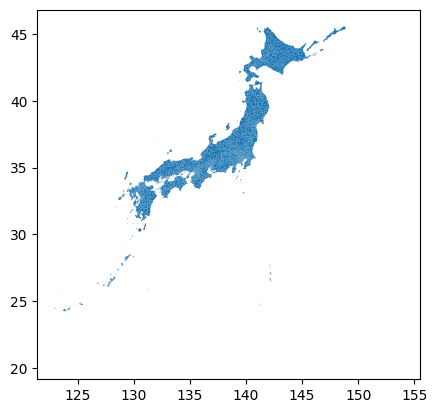

In [10]:
jpnShp = gpd.read_file(jpn_shp_path,crs='EPSG:4326')
df_city = json.loads(jpnShp.to_json())
jpnShp.plot()
cities = jpnShp['N03_004'].unique()
print(cities)

# 複数年度におけるデータ抽出

<Axes: >

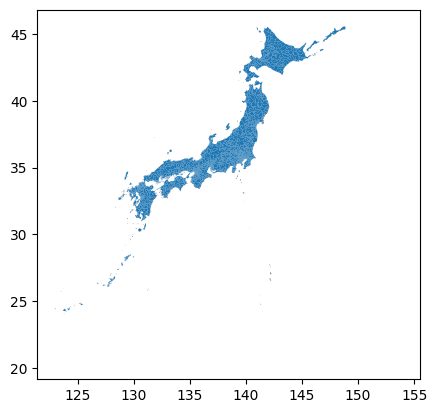

In [46]:
jpnShp = gpd.read_file(jpn_shp_path,crs='EPSG:4326')
df_time = json.loads(jpnShp.to_json())
jpnShp.plot()

In [47]:
# Define the date range
start_year = 2012
end_year = 2023

# Initialize an empty list to store images
image_list = []

# Loop through each year and add the corresponding image to the list
for year in range(start_year, end_year + 1):
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    image = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(start_date, end_date).select('avg_rad').median()
    image_list.append(image)

# Combine all the images into a single image collection
combined_image = ee.ImageCollection(image_list).mean()

# Print the result
print(combined_image)

ee.Image({
  "functionInvocationValue": {
    "functionName": "reduce.mean",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "ImageCollection.fromImages",
          "arguments": {
            "images": {
              "arrayValue": {
                "values": [
                  {
                    "functionInvocationValue": {
                      "functionName": "reduce.median",
                      "arguments": {
                        "collection": {
                          "functionInvocationValue": {
                            "functionName": "Collection.map",
                            "arguments": {
                              "baseAlgorithm": {
                                "functionDefinitionValue": {
                                  "argumentNames": [
                                    "_MAPPING_VAR_0_0"
                                  ],
                                  "body": {
                      

In [49]:
def get_prefectures_timegeo(prefecture):
    features = [f for f in df_time['features'] if f['properties']['N03_001']==prefecture]
    return ee.Geometry.MultiPolygon(features[0]['geometry']['coordinates'])

# Columns for the DataFrame
cols_nl_time = ['prefecture'] + [str(year) for year in range(start_year, end_year + 1)]
df_n_time = pd.DataFrame(columns=cols_nl_time)

# Data collection
data = []

for pres_name in pres:
    print(pres_name)
    aoi = get_prefectures_timegeo(pres_name)
    year_data = [pres_name]
    
    for year in range(start_year, end_year + 1):
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(start_date, end_date).select('avg_rad').median()
        mean_rad = ee.Number(viirs.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi, scale=25).get('avg_rad')).getInfo()
        print(f"{year}: {mean_rad}")
        year_data.append(mean_rad)
    
    data.append(year_data)

# Create DataFrame from the collected data
new_df_time = pd.DataFrame(data, columns=cols_nl_time)
print(new_df_time)

北海道


EEException: Dictionary.get: Dictionary does not contain key: 'avg_rad'.

In [54]:
import ee
import pandas as pd

ee.Initialize()

def get_prefectures_timegeo(prefecture):
    features = [f for f in df_time['features'] if f['properties']['N03_001'] == prefecture]
    return ee.Geometry.MultiPolygon(features[0]['geometry']['coordinates'])

# Columns for the DataFrame
cols_nl_time = ['prefecture'] + [str(year) for year in range(start_year, end_year + 1)]
df_nl_time = pd.DataFrame(columns=cols_nl_time)

# Data collection
data = []

for pres_name in pres:
    print(pres_name)
    aoi = get_prefectures_timegeo(pres_name)
    year_data = [pres_name]
    
    for year in range(start_year, end_year + 1):
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        try:
            viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(start_date, end_date).select('avg_rad').median()
            mean_rad = ee.Number(viirs.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi, scale=25).get('avg_rad')).getInfo()
            print(f"{year}: {mean_rad}")
        except ee.EEException as e:
            print(f"Error retrieving data for {pres_name} in {year}: {e}")
            mean_rad = None
        
        year_data.append(mean_rad)
    
    data.append(year_data)

# Create DataFrame from the collected data
new_df_time = pd.DataFrame(data, columns=cols_nl_time)
print(new_df_time)
new_df_time


北海道
Error retrieving data for 北海道 in 2012: Dictionary.get: Dictionary does not contain key: 'avg_rad'.
Error retrieving data for 北海道 in 2013: Dictionary.get: Dictionary does not contain key: 'avg_rad'.
2014: 1.9101533889770508
2015: 1.5266056060791016
2016: 1.590172290802002
2017: 1.7807559967041016


KeyboardInterrupt: 

In [57]:
print(new_df_time.sort_values(['2022','2023'],ascending=False))

   prefecture  2012  2013       2014       2015       2016       2017   
12        東京都  None  None  79.816927  74.512092  73.670070  86.189811  \
26        大阪府  None  None  54.971268  56.635933  54.135478  58.422564   
11        千葉県  None  None  65.282314  60.917470  50.833811  54.535008   
46        沖縄県  None  None  34.226883  36.235619  37.414631  41.544968   
22        愛知県  None  None  41.305111  40.696837  39.794482  42.088141   
33        広島県  None  None  31.761128  33.614007  32.361820  34.550659   
42        熊本県  None  None  27.051317  28.096404  26.139303  28.030598   
36        香川県  None  None  21.378168  21.001360  20.896706  21.738430   
1         青森県  None  None  16.361485  12.397315  10.430722  15.338614   
13       神奈川県  None  None  23.084064  20.298529  16.246440  14.672443   
14        新潟県  None  None  13.437551   9.274542  10.486567   9.235178   
29       和歌山県  None  None  14.374324  14.887892  14.122067  10.755151   
20        岐阜県  None  None   6.965716   7.067531   6

In [59]:
new_df_time.sort_values(['2023'],ascending=False)

prefecture  2012  2013       2014       2015       2016       2017   
12        東京都  None  None  79.816927  74.512092  73.670070  86.189811  \
26        大阪府  None  None  54.971268  56.635933  54.135478  58.422564   
46        沖縄県  None  None  34.226883  36.235619  37.414631  41.544968   
11        千葉県  None  None  65.282314  60.917470  50.833811  54.535008   
22        愛知県  None  None  41.305111  40.696837  39.794482  42.088141   
33        広島県  None  None  31.761128  33.614007  32.361820  34.550659   
42        熊本県  None  None  27.051317  28.096404  26.139303  28.030598   
36        香川県  None  None  21.378168  21.001360  20.896706  21.738430   
1         青森県  None  None  16.361485  12.397315  10.430722  15.338614   
13       神奈川県  None  None  23.084064  20.298529  16.246440  14.672443   
14        新潟県  None  None  13.437551   9.274542  10.486567   9.235178   
29       和歌山県  None  None  14.374324  14.887892  14.122067  10.755151   
20        岐阜県  None  None   6.965716   7.067531   6.788508   7.106655   
7         茨城県  None  None   5.377137   5.651636   5.310741   5.843407   
28        奈良県  None  None   4.624915   4.666095   4.784911   5.102269   
23        三重県  None  None   3.460568   3.556047   3.898607   4.339675   
8         栃木県  None  None   5.329592   5.205405   4.946773   5.502837   
9         群馬県  None  None   4.143539   4.045517   3.756374   4.372402   
34        山口県  None  None   3.962419   3.481365   3.457507   4.251261   
3         宮城県  None  None   3.727663   3.711894   3.407486   3.870553   
18        山梨県  None  None   3.289792   3.284990   3.185834   3.625596   
37        愛媛県  None  None   4.871752   5.213962   4.516573   4.032555   
39        福岡県  None  None   1.163662   1.264072   1.283937   1.526033   
10        埼玉県  None  None   3.416354   3.103537   3.069102   3.589027   
15        富山県  None  None   2.972244   3.744797   3.159326   2.491003   
25        京都府  None  None   2.623557   2.486595   2.653425   2.806615   
32        岡山県  None  None   2.548241   2.558361   2.578634   2.742685   
24        滋賀県  None  None   2.458730   2.408863   2.466622   2.688588   
4         秋田県  None  None   3.210982   3.525412   4.330482   4.308149   
5         山形県  None  None   2.525357   2.451135   2.385782   2.809814   
27        兵庫県  None  None   2.403007   2.227035   2.191673   2.420885   
40        佐賀県  None  None   1.946119   1.975994   1.956817   2.206770   
19        長野県  None  None   1.518894   1.478607   1.421408   1.653922   
0         北海道  None  None   1.910153   1.526606   1.590172   1.780756   
6         福島県  None  None   1.433842   1.358287   1.255439   1.582871   
35        徳島県  None  None   0.934297   0.835652   0.939115   1.276719   
2         岩手県  None  None   1.186257   1.102622   1.150164   1.447188   
38        高知県  None  None   1.054988   1.048961   1.070257   1.201325   
16        石川県  None  None   1.228654   1.159764   1.746503   1.961228   
30        鳥取県  None  None   1.099551   0.966810   1.126183   1.176379   
21        静岡県  None  None   0.806893   0.782882   0.732088   0.956710   
45       鹿児島県  None  None   0.717992   0.486203   0.507777   0.965060   
17        福井県  None  None   0.525854   0.591748   0.508717   0.576171   
44        宮崎県  None  None   0.656632   0.611320   0.532956   0.781192   
43        大分県  None  None   0.234080   0.230822   0.225443   0.415917   
31        島根県  None  None   0.298847   0.241636   0.172082   0.383258   
41        長崎県  None  None   0.143756   0.195472   0.136507   0.296664   

         2018       2019       2020       2021       2022       2023  
12  84.645021  87.438290  79.839880  80.211064  80.240302  84.908156  
26  58.258786  56.655743  56.647863  57.817339  58.521304  60.677570  
46  42.715000  39.570000  42.260002  50.489998  42.375000  46.165001  
11  47.584578  48.842777  40.263299  37.614743  42.996807  43.918819  
22  41.456637  40.893611  40.844287  40.900641  41.639103  42.086740  
33  35.273411  36.416523  36.071620  36.176474  36.281663  37.440910  
4

# 夜間光データをマッピング

In [7]:
#!pip install folium earthengine-api
import ee
import folium

# Google Earth Engineの初期化
ee.Initialize()

# 対象年と都道府県の設定
year = 2020
prefecture = 'Tokyo'

# 都道府県のジオメトリを取得する関数
def get_prefecture_geometry(prefecture_name):
    japan_prefectures = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level1")
    prefecture_feature = japan_prefectures.filter(ee.Filter.eq('ADM1_NAME', prefecture_name))
    return prefecture_feature.geometry()

# 対象年のVIIRSデータを取得
viirs_data = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG') \
                .filter(ee.Filter.date(f'{year}-01-01', f'{year}-12-31')) \
                .select('avg_rad').median()

# 対象都道府県のジオメトリを取得
prefecture_geom = get_prefecture_geometry(prefecture)

# 地図の作成
map = folium.Map(location=[35.6895, 139.6917], zoom_start=10)  # 東京の緯度経度

# VIIRSデータを地図に追加
viirs_layer = ee.Image().paint(prefecture_geom, 0, 2)
mapid = viirs_data.getMapId({'min': 0, 'max': 60, 'palette': ['black', 'blue', 'green', 'yellow', 'red']})
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='Nighttime Light',
).add_to(map)

# 都道府県の境界を地図に追加
folium.GeoJson(
    data=prefecture_geom.getInfo(),
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'red'},
    name='Prefecture Boundary'
).add_to(map)

# レイヤーコントロールを追加
folium.LayerControl().add_to(map)

# 地図の表示
map.save('map.html')
map


In [8]:
import ee
import pandas as pd
import json
import geopandas as gpd

ee.Initialize()

def get_prefectures_geo_api(prefecture):
    # 特定の都道府県のジオメトリを抽出
    selected_geometry = jpnShp_api[jpnShp_api['ADM1_NAME'] == prefecture].geometry.iloc[0]
    # ジオメトリの型を確認して適切に処理
    if selected_geometry.type == 'Polygon':
        coordinates = [selected_geometry.__geo_interface__['coordinates']]
    elif selected_geometry.type == 'MultiPolygon':
        coordinates = selected_geometry.__geo_interface__['coordinates']
    else:
        raise ValueError("Unsupported geometry type")
    return ee.Geometry.MultiPolygon(coordinates)

# Google Earth Engineから日本の都道府県データを取得
japan_prefectures_api = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level1").filter(ee.Filter.eq('ADM0_NAME', 'Japan'))
jpnShp_api = gpd.read_file('path_to_your_shapefile', crs='EPSG:4326')

# 列名を定義し、空のデータフレームを作成
cols_nl_api = ['prefecture', '2019-NL']
df_nl_api = pd.DataFrame(index=[], columns=cols_nl_api)

# 都道府県名を取得
pres_api = jpnShp_api['ADM1_NAME'].unique()

# データ収集
data_api = []
for pres_name_api in pres_api:
    print(pres_name_api)
    try:
        aoi_api = get_prefectures_geo_api(pres_name_api)
        viirs_api = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").select('avg_rad').median()
        mean_rad_api = ee.Number(viirs_api.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi_api, scale=25).get('avg_rad')).getInfo()
        data_api.append([pres_name_api, mean_rad_api])
        print(f"{pres_name_api}: {mean_rad_api}")
    except Exception as e:
        print(f"Error processing {pres_name_api}: {e}")
        data_api.append([pres_name_api, None])

# リストからデータフレームを作成
new_df_api = pd.DataFrame(data_api, columns=cols_nl_api)
print(new_df_api)


DataSourceError: path_to_your_shapefile: No such file or directory

# 市町村単位でのデータ抽出

In [19]:
def get_city_geo(city):
 features = [f for f in df_city['features'] if f['properties']['N03_004']==city]
 return ee.Geometry.MultiPolygon(features[0]['geometry']['coordinates'])

cols_nl_city = ['city', '2019-NL']
df_nl_city = pd.DataFrame(index=[], columns=cols_nl_city)
print(df_nl_city)

# あらかじめデータを収集するリストを用意
data_city = []

for city_name in cities:
    print(city_name)
    aoi = get_city_geo(city_name)
    mean_rad_city = ee.Number(viirs.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi, scale=25).get('avg_rad')).getInfo()
    print(mean_rad_city)
    data_city.append([city_name, mean_rad_city])

# リストからデータフレームを作成

Empty DataFrame
Columns: [city, 2019-NL]
Index: []
北見市
1.4300000667572021
網走市
4.12973994612852
紋別市
2.1649999618530273
斜里町
0.27000001072883606
小清水町
0.49800649411797554
清里町
0.3071839051158895
訓子府町
0.5151122550677085
佐呂間町
0.3623849090673934
置戸町
0.32107329532102924
大空町
0.49274398677460357
津別町
0.342639583956028
美幌町
0.7355806188662218
遠軽町
0.41648400735538355
興部町
6.260000228881836
西興部村
0.31054282421020024
滝上町
0.28820971967384723
湧別町
0.5350000262260437
雄武町
6.194999694824219
芦別市
0.3913608468033052
歌志内市
1.08811341230724
岩見沢市
1.5066835073661016
砂川市
1.7606721973541315
三笠市
0.7406354345039833
深川市
0.6376088543722679
赤平市
1.0316010655585492
滝川市
1.8808650277158303
美唄市
0.9619862315688634
夕張市
0.41402226170751316
雨竜町
0.38554380832493734
沼田町
0.5741085433943347
秩父別町
1.8345347540085408
北竜町
0.4441369739543759
妹背牛町
0.7309521234256628
浦臼町
0.5098577384854192
月形町
0.7461490530175526
新十津川町
0.4148829436095915
上砂川町
0.7774726115458303
奈井江町
1.0931991597026267
南幌町
1.3914720551124538
栗山町
0.8187884597713909
長沼町
1.564804289

NameError: name 'cols_nl' is not defined

In [21]:
city_df = pd.DataFrame(data_city, columns=cols_nl_city)
city_df

city   2019-NL
0      北見市  1.430000
1      網走市  4.129740
2      紋別市  2.165000
3      斜里町  0.270000
4     小清水町  0.498006
...    ...       ...
1799  久米島町  0.163585
1800  八重瀬町  1.940000
1801  多良間村  0.135000
1802   竹富町  0.140000
1803  与那国町  0.210000

[1804 rows x 2 columns]

In [23]:
city_df.to_csv('/Users/esakikeiichi/date_analysis/GIS/city_nl_csv.csv',encoding='Shift-jis')

pres    2019-NL
0    北海道   1.430000
1    青森県  13.719999
2    岩手県   1.334910
3    宮城県   3.786028
4    秋田県   4.085000
5    山形県   2.541930
6    福島県   1.412973
7    茨城県   5.941084
8    栃木県   5.329557
9    群馬県   4.283785
10   埼玉県   3.306820
11   千葉県  49.308882
12   東京都  84.872330
13  神奈川県  16.161461
14   新潟県   7.855000
15   富山県   2.785000
16   石川県   1.571746
17   福井県   0.560000
18   山梨県   3.541030
19   長野県   1.531664
20   岐阜県   7.025248
21   静岡県   0.951941
22   愛知県  41.043189
23   三重県   5.014671
24   滋賀県   2.718728
25   京都府   2.816468
26   大阪府  55.892064
27   兵庫県   2.671915
28   奈良県   5.431659
29  和歌山県   7.280653
30   鳥取県   1.015000
31   島根県   0.330000
32   岡山県   2.797386
33   広島県  36.074285
34   山口県   4.195000
35   徳島県   1.180000
36   香川県  19.880001
37   愛媛県   3.260583
38   高知県   1.375000
39   福岡県   2.125000
40   佐賀県   2.219768
41   長崎県   0.250000
42   熊本県  28.165694
43   大分県   0.390000
44   宮崎県   0.620000
45  鹿児島県   0.665000
46   沖縄県  40.044998